In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from IPython.display import display
%matplotlib inline

In [9]:
categories = ['comp.graphics', 'rec.autos','sci.electronics','sci.med','talk.politics.guns','talk.politics.mideast']
train = fetch_20newsgroups(random_state=1,
                           subset='train',
                           categories=categories)
test = fetch_20newsgroups(random_state=1,
                           subset='test',
                           categories=categories)
#print(train.data[0])

In [10]:
#统计数据集
cat_number = len(categories)
train_data_count = [0]*cat_number
test_data_count = [0]*cat_number
for target in train.target:
    train_data_count[target] += 1 
for target in test.target:
    test_data_count[target] += 1     
for i in range(0,cat_number):
    print(train.target_names[i]+" have "+ str(train_data_count[i]) + " train data, and "+ str(test_data_count[i])+ " test data.")

comp.graphics have 584 train data, and 389 test data.
rec.autos have 594 train data, and 396 test data.
sci.electronics have 591 train data, and 393 test data.
sci.med have 594 train data, and 396 test data.
talk.politics.guns have 546 train data, and 364 test data.
talk.politics.mideast have 564 train data, and 376 test data.


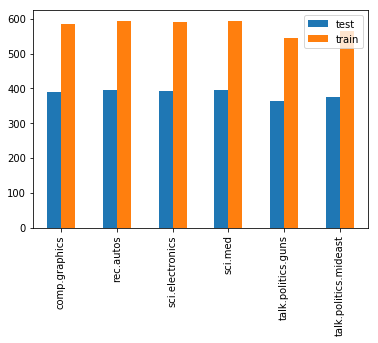

In [11]:
#图表展示
import pandas as pd
data = { 'train':train_data_count,
         'test':test_data_count }
df = pd.DataFrame(data)
df.index = train.target_names
df.plot(kind='bar')

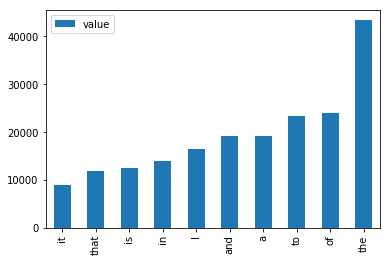

In [12]:
#统计高频词
import re
words_dic = {}
for content in train.data:
    words = re.sub("\W"," ",content).split()
    for word in words:
        if word in words_dic:
            words_dic[word] += 1
        else:
            words_dic[word] = 1
keys = list(words_dic.keys())
values = list(words_dic.values())
frame = pd.DataFrame({"value":values})
frame.index = keys
frame = frame.sort_values(axis = 0,by = 'value')
frame = frame.iloc[-10:,:]
frame.plot(kind='bar')

The shortest is 18 and the longest is 12172
The average is 321


(array([  3.35300000e+03,   8.10000000e+01,   1.50000000e+01,
          6.00000000e+00,   6.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   2.00000000e+00]),
 array([    18.        ,   1030.83333333,   2043.66666667,   3056.5       ,
          4069.33333333,   5082.16666667,   6095.        ,   7107.83333333,
          8120.66666667,   9133.5       ,  10146.33333333,  11159.16666667,
         12172.        ]),
 <a list of 12 Patch objects>)

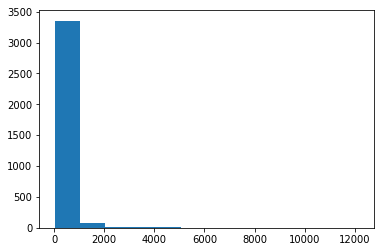

In [32]:
#统计文本长度
import matplotlib.pyplot as plt
def count_length(data):
    length_list = []
    for i in range(0,len(data)):
        content = data[i]
        temp = content
        content = re.sub("\W"," ",content).split()
        length = len(content)
        length_list.append(length)
    length_list.sort()
    print("The shortest is " + str(length_list[0]) + " and the longest is " +str(length_list[-1]))
    print("The average is " + str(sum(length_list)/len(length_list)))
    return length_list
train_length_list = count_length(train.data)
plt.hist(train_length_list, bins=12)

In [4]:
# 抽取特征
from sklearn.feature_extraction.text import HashingVectorizer  
vectorizer = HashingVectorizer(stop_words = 'english',n_features = 20000,non_negative=True)  
train_data = vectorizer.fit_transform(train.data)  
test_data = vectorizer.transform(test.data)
print(train_data.shape)
print(test_data.shape)

C:\Users\xzmh2o\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\xzmh2o\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\xzmh2o\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


(3473, 20000)
(2314, 20000)


In [5]:
# 训练基准模型并测试性能
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import time

clf_lsv = SVC(kernel='linear')
t = time.time()
clf_lsv.fit(train_data,train.target)
print("svc训练时间为" + str(time.time()-t))
t = time.time()
test_predict = clf_lsv.predict(test_data)
print("svc预测时间为" + str(time.time()-t))
print(classification_report(test.target, test_predict,target_names=test.target_names))
lclf = LinearSVC()
t = time.time()
lclf.fit(train_data,train.target)
print("线性SVC训练时间为" + str(time.time()-t))
t = time.time()
test_predict = lclf.predict(test_data)
print("线性SVC预测时间为" + str(time.time()-t))
print(classification_report(test.target, test_predict,target_names=test.target_names))

svc训练时间为8.19200015068
svc预测时间为4.47499990463
                       precision    recall  f1-score   support

        comp.graphics       0.85      0.87      0.86       389
            rec.autos       0.92      0.90      0.91       396
      sci.electronics       0.76      0.89      0.82       393
              sci.med       0.89      0.83      0.86       396
   talk.politics.guns       0.95      0.93      0.94       364
talk.politics.mideast       0.99      0.89      0.93       376

          avg / total       0.89      0.88      0.89      2314

线性SVC训练时间为0.140999794006
线性SVC预测时间为0.00200009346008
                       precision    recall  f1-score   support

        comp.graphics       0.88      0.89      0.88       389
            rec.autos       0.91      0.92      0.92       396
      sci.electronics       0.82      0.90      0.86       393
              sci.med       0.93      0.87      0.90       396
   talk.politics.guns       0.94      0.95      0.94       364
talk.politics.mide

In [14]:
# 为创建词向量做预处理
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim.parsing.preprocessing import STOPWORDS
processed_train = []
processed_test = []
for document in train.data:
    document = document.lower()
    words = re.sub("\W"," ",document).split()
    for i in range(0,len(words)):
        words[i] = words[i].replace("_", "")
    words = [w for w in words if w not in STOPWORDS and len(w) > 1 and any(char.isalpha() for char in w)]
    processed_train.append(words)
for document in test.data:
    document = document.lower()
    words = re.sub("\W"," ",document).split()
    for i in range(0,len(words)):
        words[i] = words[i].replace("_", "")
    words = [w for w in words if w not in STOPWORDS and len(w) > 1 and any(char.isalpha() for char in w)]
    processed_test.append(words)

In [16]:
# 训练词向量模型并保存
from gensim.models import Word2Vec 
import os
size = 100
name = './myword2vec.model'
if os.path.exists(name):
    model = Word2Vec.load('./myword2vec.model') 
else:
    model = Word2Vec(processed_train,sg=1,min_count=3)
    model.save('./myword2vec.model')
word_vectors = model.wv

In [11]:
#使用简单的求和方式获取文档向量
from sklearn import preprocessing 
docs_vec_test = []
def get_simple_vec_data(processed):
    result = []
    for words in processed:
        doc_vec = np.array([0] * size)
        for word in words:
            length = 0
            if word in word_vectors:
                length += 1
                doc_vec =doc_vec + word_vectors[word]
                doc_vec = doc_vec/float(length)
        result.append(doc_vec)
    return np.array(result)
docs_vec_train = get_simple_vec_data(processed_train) 
docs_vec_test = get_simple_vec_data(processed_test)

In [13]:
lclf = LinearSVC()
lclf.fit(docs_vec_train,train.target)
test_lsv_predict = lclf.predict(docs_vec_test)
print(classification_report(test.target, test_lsv_predict,target_names=test.target_names))

                       precision    recall  f1-score   support

        comp.graphics       0.77      0.87      0.82       389
            rec.autos       0.90      0.80      0.85       396
      sci.electronics       0.74      0.73      0.73       393
              sci.med       0.83      0.88      0.86       396
   talk.politics.guns       0.98      0.88      0.93       364
talk.politics.mideast       0.93      0.96      0.94       376

          avg / total       0.86      0.85      0.85      2314



In [15]:
#搜索参数
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

cross_validator = KFold(n_splits=6)
parameters = {'C':[0.01,0.05,0.1,0.5,1,2]}
clf = LinearSVC()
scorer = make_scorer(f1_score,average='macro')
grid_obj = GridSearchCV(clf, parameters, cv = cross_validator, scoring = scorer)
grid_obj = grid_obj.fit(docs_vec_train, train.target)
print(grid_obj.best_params_)

{'C': 0.01}


In [17]:
#训练分类模型并测试性能
clf_l = grid_obj.best_estimator_
train_vec_predict = clf_l.predict(docs_vec_train)
print("训练集结果")
print(classification_report(train.target, train_vec_predict,target_names=test.target_names))
test_vec_predict = clf_l.predict(docs_vec_test)
print("测试集结果")
print(classification_report(test.target, test_vec_predict,target_names=test.target_names))

训练集结果
                       precision    recall  f1-score   support

        comp.graphics       0.92      0.91      0.91       584
            rec.autos       0.91      0.93      0.92       594
      sci.electronics       0.89      0.86      0.87       591
              sci.med       0.93      0.95      0.94       594
   talk.politics.guns       0.96      0.96      0.96       546
talk.politics.mideast       0.99      0.99      0.99       564

          avg / total       0.93      0.93      0.93      3473

测试集结果
                       precision    recall  f1-score   support

        comp.graphics       0.82      0.86      0.84       389
            rec.autos       0.90      0.88      0.89       396
      sci.electronics       0.78      0.73      0.76       393
              sci.med       0.85      0.90      0.87       396
   talk.politics.guns       0.93      0.93      0.93       364
talk.politics.mideast       0.96      0.95      0.96       376

          avg / total       0.87      

In [17]:
# 计算idf字典
idf_count_dic = {}
# 计算权重字典
use_count_dic = {}
i = 0
for key in word_vectors.vocab:
    i += 1
    if i % 1000 == 0:
        print("已统计"+str(i)+"个词")
    count = 0
    for j in range(0,len(processed_train)):
        document = processed_train[j]
        if key in document:
            count += 1
            if key in use_count_dic:
                use_count_dic[key][train.target[j]] += 1
            else:
                use_count_dic[key] = [0]* len(categories)
                use_count_dic[key][train.target[j]] = 1
    idf_count_dic[key] = count


已统计1000个词
已统计2000个词
已统计3000个词
已统计4000个词
已统计5000个词
已统计6000个词
已统计7000个词
已统计8000个词
已统计9000个词
已统计10000个词
已统计11000个词
已统计12000个词
已统计13000个词
已统计14000个词
已统计15000个词
已统计16000个词
已统计17000个词
已统计18000个词
已统计19000个词
已统计20000个词


In [18]:
#结合idf获取文档向量
train_ducoment_number = len(processed_train)
def get_idf_vec_data(document_words):
    result = []
    for i in range(0,len(document_words)):
        doc_vec = np.array([0] * size,dtype='float64')
        factor = 0
        for word in document_words[i]:
            if word in idf_count_dic:
                idf = np.log10(train_ducoment_number/float(idf_count_dic[word]+1))
                doc_vec += idf * word_vectors[word]
                factor += np.square(idf) 
        result.append((doc_vec/np.sqrt(factor)).tolist())
    return  np.array(result)

docs_vec_train2 = get_idf_vec_data(processed_train)  
docs_vec_test2 = get_idf_vec_data(processed_test) 

In [19]:
#搜索参数
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

cross_validator = KFold(n_splits=6)
parameters = {'C':[0.01,0.1,0.5,1,2,3]}
clf = LinearSVC()
scorer = make_scorer(f1_score,average='macro')
grid_obj = GridSearchCV(clf, parameters, cv = cross_validator, scoring = scorer)
grid_obj = grid_obj.fit(docs_vec_train2, train.target)
print(grid_obj.best_params_)

{'C': 1}


In [20]:
#训练分类模型并测试性能
clf_2 = grid_obj.best_estimator_
train_vec_predict2 = clf_2.predict(docs_vec_train2)
print("训练集结果")
print(classification_report(train.target, train_vec_predict2,target_names=test.target_names))
test_vec_predict2 = clf_2.predict(docs_vec_test2)
print("测试集结果")
print(classification_report(test.target, test_vec_predict2,target_names=test.target_names))

训练集结果
                       precision    recall  f1-score   support

        comp.graphics       0.91      0.94      0.93       584
            rec.autos       0.94      0.94      0.94       594
      sci.electronics       0.90      0.87      0.88       591
              sci.med       0.96      0.95      0.96       594
   talk.politics.guns       0.97      0.97      0.97       546
talk.politics.mideast       0.99      0.99      0.99       564

          avg / total       0.94      0.94      0.94      3473

测试集结果
                       precision    recall  f1-score   support

        comp.graphics       0.84      0.89      0.87       389
            rec.autos       0.92      0.91      0.91       396
      sci.electronics       0.82      0.78      0.80       393
              sci.med       0.91      0.90      0.91       396
   talk.politics.guns       0.93      0.96      0.94       364
talk.politics.mideast       0.97      0.95      0.96       376

          avg / total       0.90      

In [42]:
#搜集分类错误的测试数据
wrong_test_id = []
for i in range(0,len(test.target)):
    if test.target[i] != test_vec_predict2[i]:
        wrong_test_id.append(i)
print(len(wrong_test_id))

237


In [40]:
wrong_data = []
for i in wrong_test_id:
    wrong_data.append(test.data[i])
a = count_length(wrong_data)
b = count_length(test.data)

The shortest is 27 and the longest is 1656
The average is 216
The shortest is 21 and the longest is 10061
The average is 324


In [64]:
#个体分析
number = 1
example = wrong_test_id[number]
print(test.data[example])
print(test.target_names[test.target[example]])
print(test.target_names[test_vec_predict2[example]])

From: "Arun G. Jayakumar" <aj22+@andrew.cmu.edu>
Subject: VASCAR
Organization: Freshman, Biology, Carnegie Mellon, Pittsburgh, PA
Lines: 16
NNTP-Posting-Host: po3.andrew.cmu.edu

I know this is the wrong place to post this, but I couldn't find any
relevant newsgroups in my area.

For those of you who are from PA, where is VASCAR (where the cops
measure your speed from the time it takes you to cross the distance
between two white lines on the road, right?) most commonly used?  I'm
especially interested in the Pittsburgh area (specific locations, prior
experiences, if possible).  For those PA and non-PA, if they use VASCAR
in your state, is it most common in rural, city, highway areas, etc. 
What I'm interested in mainly is where I can speed with the least risk
of being caught.  You can always detect radar, but there's no way to
fight VASCAR unless you know where all the white lines are.

Thanks a lot,

    Arun Jayakumar

rec.autos
sci.electronics
